# Introduction
---
In this project, we will see what variables increase the charges from insurance. Then, we will look at the most significant variables.

# Introduction to dataset
---
We are given 6 features and 1 target variables. Three of the features are qualitative, the rest are quantitative. `BMI` is continuous, while the number of `children` is discrete, which makes sense, we can't have half a child. And the target variables, `charges` is continuous because it represents a money amount, which we know is a float and is not really countable. 

Qualitative Variables:
- Sex (str)
- Smoker (str)
- Region (str)

Quantitative Variables: 
- BMI (f64)
- Children (i64)
- Charges (f64)

# Understanding the data
---
To understand the data, we can look at the proportion of sex and region to see if it's balanced and just to see if maybe a certain region is paying more. Another thing we want to look at is the distribution of quantitative variables to check if there is a skewness in the data, if there are outliers. For children, we could also do something like a histogram since it's a discrete variable and we can assume that there's not going to be something extreme for the number of children. We can also just find the average number of children as well. The next thing we want to do is to encode the qualitative variables, so they are represented as numbers that map to a certain string value. The reason we do this is because most models don't accept string values, only numerical values. 

In [1]:
import kagglehub

path = kagglehub.dataset_download("mosapabdelghany/medical-insurance-cost-dataset")

/home/rojacobeus/Documents/projects/data-modeling-sp500-forecasting/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import polars as pl
from pathlib import Path

df = pl.read_csv(Path(path) / "insurance.csv")
df.head()

age,sex,bmi,children,smoker,region,charges
i64,str,f64,i64,str,str,f64
19,"""female""",27.9,0,"""yes""","""southwest""",16884.924
18,"""male""",33.77,1,"""no""","""southeast""",1725.5523
28,"""male""",33.0,3,"""no""","""southeast""",4449.462
33,"""male""",22.705,0,"""no""","""northwest""",21984.47061
32,"""male""",28.88,0,"""no""","""northwest""",3866.8552


In [3]:
df.null_count()

age,sex,bmi,children,smoker,region,charges
u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0


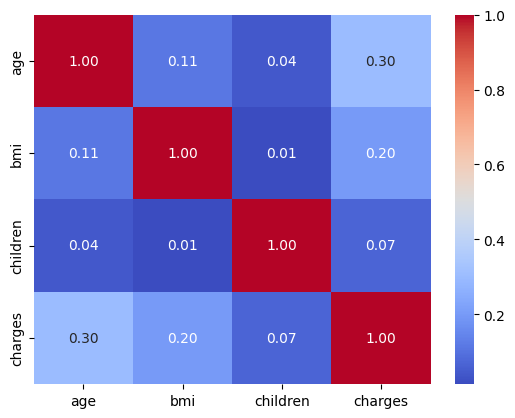

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = [col for col in df.columns if df[col].dtype in (pl.Float64, pl.Int64)]
categorical_cols = [col for col in df.columns if df[col].dtype in (pl.Categorical, pl.String)]
corr = df.select(numeric_cols).corr()
sns.heatmap(data=corr, annot=True, cmap="coolwarm", fmt=".2f", xticklabels=numeric_cols, yticklabels=numeric_cols)
plt.show()

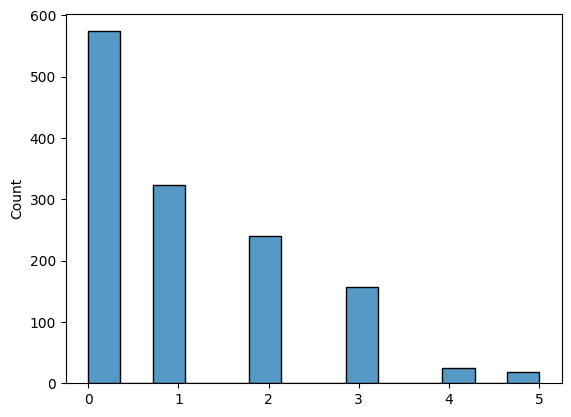

In [5]:
sns.histplot(data=df["children"])
plt.show()

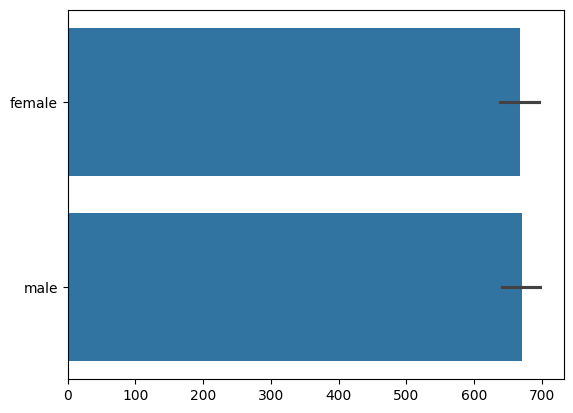

In [6]:
sns.barplot(data=df["sex"])
plt.show()

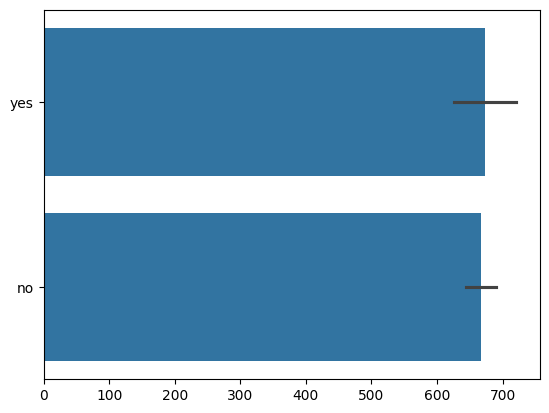

In [7]:
sns.barplot(data=df["smoker"])
plt.show()

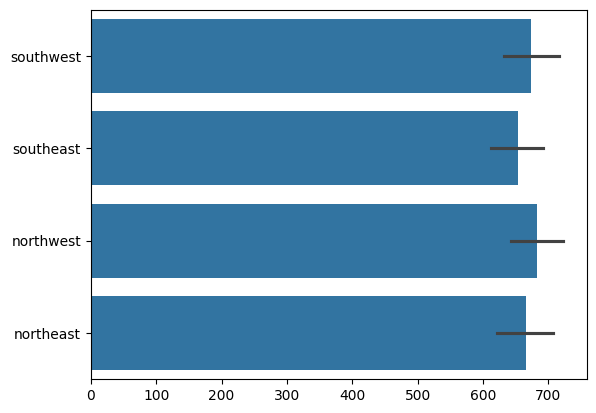

In [8]:
sns.barplot(data=df["region"])
plt.show()

The dataset's categorical variables are balanced. 

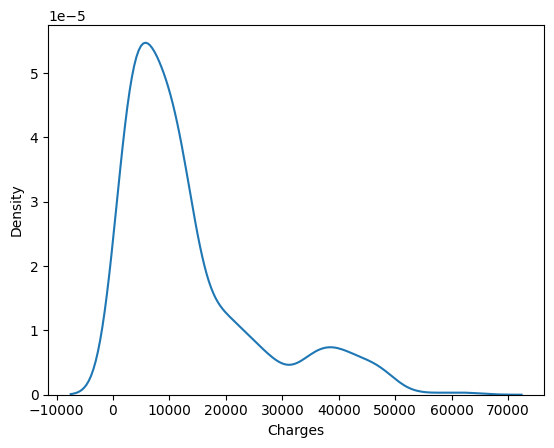

In [9]:
sns.kdeplot(data=df["charges"])
plt.xlabel("Charges")
plt.show()

In [10]:
df.describe()

statistic,age,sex,bmi,children,smoker,region,charges
str,f64,str,f64,f64,str,str,f64
"""count""",1338.0,"""1338""",1338.0,1338.0,"""1338""","""1338""",1338.0
"""null_count""",0.0,"""0""",0.0,0.0,"""0""","""0""",0.0
"""mean""",39.207025,null,30.663397,1.094918,null,null,13270.422265
"""std""",14.04996,null,6.098187,1.205493,null,null,12110.011237
"""min""",18.0,"""female""",15.96,0.0,"""no""","""northeast""",1121.8739
"""25%""",27.0,null,26.29,0.0,null,null,4738.2682
"""50%""",39.0,null,30.4,1.0,null,null,9386.1613
"""75%""",51.0,null,34.7,2.0,null,null,16657.71745
"""max""",64.0,"""male""",53.13,5.0,"""yes""","""southwest""",63770.42801


Charges are skewed to the right. Most charges are around $9,000. There are probably some outliers with extreme charges.

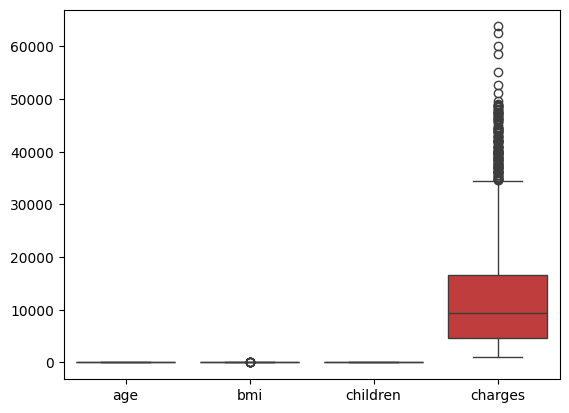

In [11]:
sns.boxplot(df[numeric_cols])
plt.xticks(ticks=list(range(len(numeric_cols))), labels=numeric_cols)
plt.show()

# Preprocessing - Experiment 1
---
We don't need a lot preprocessing steps for this experiment. I'm going to use OLS for the modeling using statsmodels. I will try experiment 1 without scaling and with scaling, and see the difference of results. But for both models, we need to get dummy variables for the categorical variables and drop the first column because our other parts of each variable will determine each other, if you know what I mean, and we need to make sure our model is as simple as possible. 

In [76]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

df_with_dummies = df.to_dummies(columns=categorical_cols, drop_first=True)
x = df_with_dummies.drop(["charges"]).to_numpy()
y = df_with_dummies["charges"].to_numpy()

In [77]:
df.shape[0]

1338

In [78]:
TRAIN_SIZE = 0.7
TEST_SIZE  = 0.3
TRAIN_INDEX = np.int16(np.ceil(df_with_dummies.shape[0] * TRAIN_SIZE))

## Modeling - Experiment 1
---

In [79]:
x_train, y_train = x[:TRAIN_INDEX], y[:TRAIN_INDEX]
x_test, y_test   = x[TRAIN_INDEX:], y[TRAIN_INDEX:]

In [80]:
X_train_const = sm.add_constant(x_train)

In [81]:
model_exp1 = sm.OLS(y_train, X_train_const)
results_exp1 = model_exp1.fit()
results_exp1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     368.5
Date:                Tue, 14 Oct 2025   Prob (F-statistic):          6.10e-282
Time:                        16:35:18   Log-Likelihood:                -9463.7
No. Observations:                 937   AIC:                         1.895e+04
Df Residuals:                     928   BIC:                         1.899e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.099e+04   1267.415      8.675      0.000    8507.218    1.35e+04
x1           258.9155     13.708     18.888      0.000     232.013     285.818
x2          -397.7083    388.885     -1.023      0.307   -1160.904     365.488
x3           340.7778     33.647     10.128      0.000     274.745     406.811
x4           434.9881    163.152      2.666      0.008     114.798     755.179
x5         -2.407e+04    489.777    -49.143      0.000    -2.5e+04   -2.31e+04
x6          1148.6301    553.099      2.077      0.038      63.159    2234.101
x7           627.9014    562.447      1.116      0.265    -475.914    1731.717
x8          -105.7890    543.590     -0.195      0.846   -1172.598     961.020
==============================================================================
Omnibus:                      218.954   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              540.649
Skew:                           1.227   Prob(JB):                    3.98e-118
Kurtosis:                       5.797   Cond. No.                         352.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""